# The function dj_problem_oracle (below) returns a Deutsch-Jozsa oracle for n = 4 in the form of a gate. The gate takes 5 qubits as input where the final qubit (q_4) is the output qubit (as with the example oracles above). You can get different oracles by giving dj_problem_oracle different integers between 1 and 5. Use the Deutsch-Jozsa algorithm to decide whether each oracle is balanced or constant

In [10]:
import numpy as np

from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile

from qiskit.visualization import plot_histogram
from qiskit_textbook.problems import dj_problem_oracle

In [11]:
def dj_oracle(case, n):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input,
    # plus one output qubit
    oracle_qc = QuantumCircuit(n+1)
    
    # First, let's deal with the case in which oracle is balanced
    if case == "balanced":
        # First generate a random number that tells us which CNOTs to
        # wrap in X-gates:
        b = np.random.randint(1,2**n)
        # Next, format 'b' as a binary string of length 'n', padded with zeros:
        b_str = format(b, '0'+str(n)+'b')
        # Next, we place the first X-gates. Each digit in our binary string 
        # corresponds to a qubit, if the digit is 0, we do nothing, if it's 1
        # we apply an X-gate to that qubit:
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        # Do the controlled-NOT gates for each qubit, using the output qubit 
        # as the target:
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        # Next, place the final X-gates
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    # Case in which oracle is constant
    if case == "constant":
        # First decide what the fixed output of the oracle will be
        # (either always 0 or always 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # To show when we display the circuit
    return oracle_gate

In [12]:
def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    # Set up the output qubit:
    dj_circuit.x(n)
    dj_circuit.h(n)
    # And set up the input register:
    for qubit in range(n):
        dj_circuit.h(qubit)
    # Let's append the oracle gate to our circuit:
    dj_circuit.append(oracle, range(n+1))
    # Finally, perform the H-gates again and measure:
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    for i in range(n):
        dj_circuit.measure(i, i)
    
    return dj_circuit

In [22]:
n = 4

# 1.

In [23]:
oracle = dj_problem_oracle(1)
dj_circuit = dj_algorithm(oracle, n)
dj_circuit.draw()

┌───┐     ┌─────────────┐┌───┐┌─┐         
q_0: ┤ H ├─────┤0            ├┤ H ├┤M├─────────
     ├───┤     │             │├───┤└╥┘┌─┐      
q_1: ┤ H ├─────┤1            ├┤ H ├─╫─┤M├──────
     ├───┤     │             │├───┤ ║ └╥┘┌─┐   
q_2: ┤ H ├─────┤2 circuit-35 ├┤ H ├─╫──╫─┤M├───
     ├───┤     │             │├───┤ ║  ║ └╥┘┌─┐
q_3: ┤ H ├─────┤3            ├┤ H ├─╫──╫──╫─┤M├
     ├───┤┌───┐│             │└───┘ ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├┤4            ├──────╫──╫──╫──╫─
     └───┘└───┘└─────────────┘      ║  ║  ║  ║ 
c: 4/═══════════════════════════════╩══╩══╩══╩═
                                    0  1  2  3

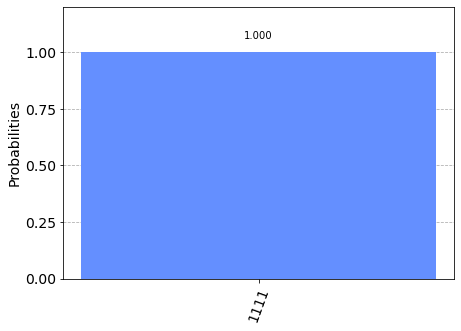

In [24]:
sim = Aer.get_backend('aer_simulator')
transpiled_dj_circuit = transpile(dj_circuit, sim)
qobj = assemble(transpiled_dj_circuit)
results = sim.run(qobj).result()
answer = results.get_counts()
plot_histogram(answer)

# 2.

In [25]:
oracle = dj_problem_oracle(2)
dj_circuit = dj_algorithm(oracle, n)
dj_circuit.draw()

┌───┐     ┌──────────────┐┌───┐┌─┐         
q_0: ┤ H ├─────┤0             ├┤ H ├┤M├─────────
     ├───┤     │              │├───┤└╥┘┌─┐      
q_1: ┤ H ├─────┤1             ├┤ H ├─╫─┤M├──────
     ├───┤     │              │├───┤ ║ └╥┘┌─┐   
q_2: ┤ H ├─────┤2 circuit-369 ├┤ H ├─╫──╫─┤M├───
     ├───┤     │              │├───┤ ║  ║ └╥┘┌─┐
q_3: ┤ H ├─────┤3             ├┤ H ├─╫──╫──╫─┤M├
     ├───┤┌───┐│              │└───┘ ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├┤4             ├──────╫──╫──╫──╫─
     └───┘└───┘└──────────────┘      ║  ║  ║  ║ 
c: 4/════════════════════════════════╩══╩══╩══╩═
                                     0  1  2  3

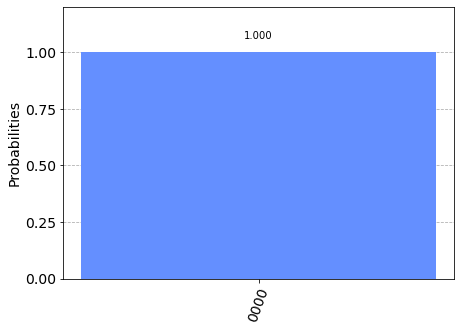

In [26]:
sim = Aer.get_backend('aer_simulator')
transpiled_dj_circuit = transpile(dj_circuit, sim)
qobj = assemble(transpiled_dj_circuit)
results = sim.run(qobj).result()
answer = results.get_counts()
plot_histogram(answer)

# 3.

In [27]:
oracle = dj_problem_oracle(3)
dj_circuit = dj_algorithm(oracle, n)
dj_circuit.draw()

┌───┐     ┌──────────────┐┌───┐┌─┐         
q_0: ┤ H ├─────┤0             ├┤ H ├┤M├─────────
     ├───┤     │              │├───┤└╥┘┌─┐      
q_1: ┤ H ├─────┤1             ├┤ H ├─╫─┤M├──────
     ├───┤     │              │├───┤ ║ └╥┘┌─┐   
q_2: ┤ H ├─────┤2 circuit-464 ├┤ H ├─╫──╫─┤M├───
     ├───┤     │              │├───┤ ║  ║ └╥┘┌─┐
q_3: ┤ H ├─────┤3             ├┤ H ├─╫──╫──╫─┤M├
     ├───┤┌───┐│              │└───┘ ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├┤4             ├──────╫──╫──╫──╫─
     └───┘└───┘└──────────────┘      ║  ║  ║  ║ 
c: 4/════════════════════════════════╩══╩══╩══╩═
                                     0  1  2  3

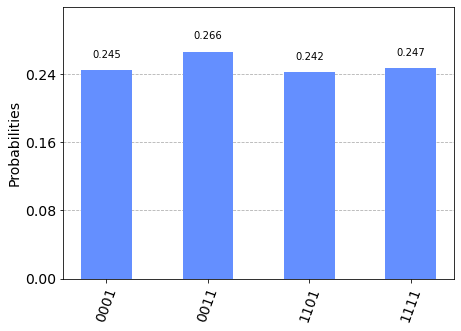

In [28]:
sim = Aer.get_backend('aer_simulator')
transpiled_dj_circuit = transpile(dj_circuit, sim)
qobj = assemble(transpiled_dj_circuit)
results = sim.run(qobj).result()
answer = results.get_counts()
plot_histogram(answer)

# 4.

In [29]:
oracle = dj_problem_oracle(4)
dj_circuit = dj_algorithm(oracle, n)
dj_circuit.draw()

┌───┐     ┌──────────────┐┌───┐┌─┐         
q_0: ┤ H ├─────┤0             ├┤ H ├┤M├─────────
     ├───┤     │              │├───┤└╥┘┌─┐      
q_1: ┤ H ├─────┤1             ├┤ H ├─╫─┤M├──────
     ├───┤     │              │├───┤ ║ └╥┘┌─┐   
q_2: ┤ H ├─────┤2 circuit-793 ├┤ H ├─╫──╫─┤M├───
     ├───┤     │              │├───┤ ║  ║ └╥┘┌─┐
q_3: ┤ H ├─────┤3             ├┤ H ├─╫──╫──╫─┤M├
     ├───┤┌───┐│              │└───┘ ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├┤4             ├──────╫──╫──╫──╫─
     └───┘└───┘└──────────────┘      ║  ║  ║  ║ 
c: 4/════════════════════════════════╩══╩══╩══╩═
                                     0  1  2  3

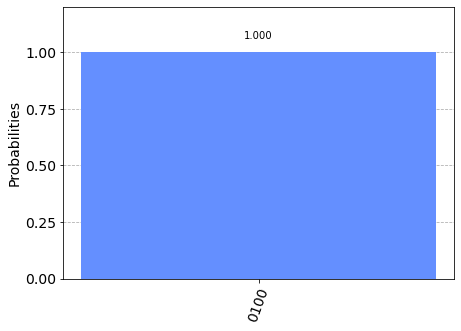

In [30]:
sim = Aer.get_backend('aer_simulator')
transpiled_dj_circuit = transpile(dj_circuit, sim)
qobj = assemble(transpiled_dj_circuit)
results = sim.run(qobj).result()
answer = results.get_counts()
plot_histogram(answer)

# 5.

In [31]:
oracle = dj_problem_oracle(5)
dj_circuit = dj_algorithm(oracle, n)
dj_circuit.draw()

There are only currently 4 oracles in this problem set, returning empty (balanced) gate


┌───┐     ┌──────────────┐┌───┐┌─┐         
q_0: ┤ H ├─────┤0             ├┤ H ├┤M├─────────
     ├───┤     │              │├───┤└╥┘┌─┐      
q_1: ┤ H ├─────┤1             ├┤ H ├─╫─┤M├──────
     ├───┤     │              │├───┤ ║ └╥┘┌─┐   
q_2: ┤ H ├─────┤2 circuit-906 ├┤ H ├─╫──╫─┤M├───
     ├───┤     │              │├───┤ ║  ║ └╥┘┌─┐
q_3: ┤ H ├─────┤3             ├┤ H ├─╫──╫──╫─┤M├
     ├───┤┌───┐│              │└───┘ ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├┤4             ├──────╫──╫──╫──╫─
     └───┘└───┘└──────────────┘      ║  ║  ║  ║ 
c: 4/════════════════════════════════╩══╩══╩══╩═
                                     0  1  2  3

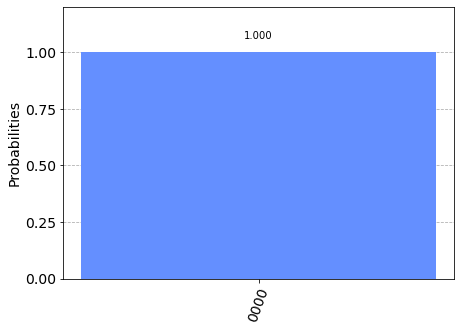

In [32]:
sim = Aer.get_backend('aer_simulator')
transpiled_dj_circuit = transpile(dj_circuit, sim)
qobj = assemble(transpiled_dj_circuit)
results = sim.run(qobj).result()
answer = results.get_counts()
plot_histogram(answer)